<a href="https://colab.research.google.com/github/skrzypczykt/MAchineLearningProjects/blob/main/NeuralNetworksTutorials/NeuralNetworksTutorials/keras/CNN/Konwolucje_zadanie_gotowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# Splot (*convolution*)
**Splot** to operacja, z którą już mieliście do czynienia na analizie danych eeg. Nawet jeżeli nie uczyliście się bezpośrednio o splocie, to zarówno filtrowanie sygnału, jak i analiza czas częstość opiera się na operacji splotu. Splot okazuje się również bardzo pomocny gdy budujemy sieci neuronowe do analizy obrazu - przy czym w tym wypadku splot odbywa się w (co najmniej) dwóch wymiarach.  

## Na czym polega splot
Oryginalny obrazek (lazurowa macierz poniżej) jest przekształcany za pomocą splotu, dając nowy obrazek (macierz w kolorze grynszpan / cyrankowym). Każdy pixel **nowej** macierzy tworzony jest poprzez przemnożenie przez filtr (*kernel*, szara przesuwająca się mała macierz) danego pixela i jego sąsiadów ze **starej** macierzy, a następnie zsumowanie otrzymanych wartości:  
<img src=https://miro.medium.com/max/790/1*nYf_cUIHFEWU1JXGwnz-Ig.gif>  
W przypadku splotowzch sieci neuronowych (**CNN** od *Convolutional Neural Networks*) - neurony uczą się wag filtrów (*Kernel* w wizualizacji powyżej) wykorzystywanych w splocie. Więcej o tym powiemy sobie później w tym notebook'u.  

## Pierwsze spotkanie ze splotem
Zanim przejdziemy dalej przerobimy kilka przykładów splotu, celem jego lepszego zrozumienie w dwóch wymiarach oraz jego użyteczności do analizy obrazu.  
Wczytamy najpierw przykładowy obraz ze `scipy`:

In [ ]:
import scipy.misc

ascent = scipy.misc.ascent()

obraz ten to po prostu dwuwymiarowa macierz, zobaczmy jaki ma kształt:

In [ ]:
ascent.shape

(512, 512)

aby wyświetlić obraz wykorzystamy funkcję `imshow` biblioteki `matplotlib`:

(-0.5, 511.5, 511.5, -0.5)

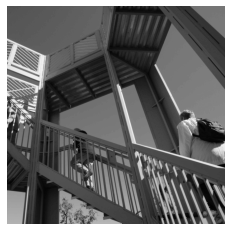

In [ ]:
plt.imshow(ascent, cmap='gray')
plt.axis('off')  # <- wyłączamy ramki wykresu, nie są potrzebne jeżeli wyświetlana macierz to obraz

Przetestujemy na tym obrazie zachowanie splotu. Najpierw utworzymy i wyświetlimy filtr, który chcemy spleść z obrazem:

In [ ]:
kernel = [[-1, 0, 1],
          [-1, 0, 1],
          [-1, 0, 1]]
kernel = np.array(kernel)

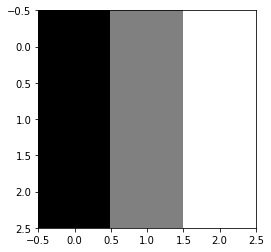

In [ ]:
# wyświetlmy kernel
plt.imshow(kernel, cmap='gray')

Splot to w zasadzie krocząca korelacja (tyle że bez normalizacji, dzięki której korelacja mieści się między -1 a 1) - mówi nam w jakim stopniu dany fragment obrazu jest podobny do filtra. Dlatego korzystamy z implementacji `correlate` dostępnej w ramach `scipy.signal`:

In [ ]:
from scipy.signal import correlate

Poniżej wykorzystaj `correlate` podając odpowiednie agumenty (obraz i filtr). W razie wątpliwości względem kolejności agrumentów - sprawdź dokumentację funkcji `correlate`.

In [ ]:
ascent_k1 = correlate(ascent, kernel)

Otrzymaliśmy wynik splotu, który możemy nazwyać "mapą korelacyjną" - znajduje się w zmiennej `ascent_k1`. Następnie wyświetlimy sobie tę mapę. Poniżej stosujemy `vmin` i `vmax` aby wyznaczyć minima i maksima skali kolorystycznej (splot nie jest normalizowany, tak jak korelacja, do zakresu -1 - 1):

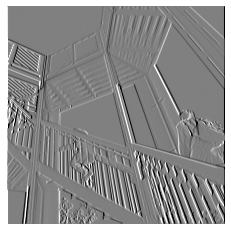

In [ ]:
plt.imshow(ascent_k1, cmap='gray', vmin=-255, vmax=255)
plt.axis('off');

Wynik splotu ma wysokie wartości tam gdzie obserwujemy horyzontalne przejście z ciemnych do jasnych wartości.  
Spójrz na definicję filtra i zastanów się dlaczego. Przypomnij sobie jaka wartość piksela odpowiada ciemnemu, a jaka jasnemu.

Stwórzmy teraz i wyświetlmy inny filtr:

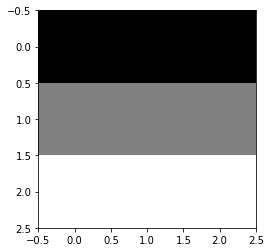

In [ ]:
kernel2 = [[-1, -1, -1],
          [0, 0, 0],
          [1, 1, 1]]
kernel2 = np.array(kernel2)
plt.imshow(kernel2, cmap='gray')

Patrząc na definicję wag filtra - czy jesteś w stanie przewidzieć na jakie cechy fragmentów obrazu będzie reagował najsilniej?  
Zobaczmy jak wygląda wynik splecenia go z obrazem:

(-0.5, 513.5, 513.5, -0.5)

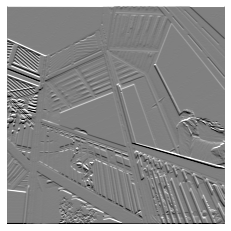

In [ ]:
ascent_k2 = correlate(ascent, kernel2)

plt.imshow(ascent_k2, cmap='gray', vmin=-255, vmax=255)
plt.axis('off')

Czy twoje przewidywania zgadzają się z obrazem?

Zobaczmy teraz na jednym wykresie oryginalny obraz oraz oba sploty:

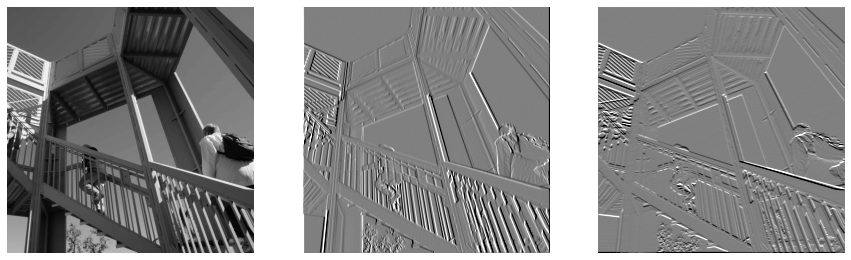

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

images = [ascent, ascent_k1, ascent_k2]
for a, img in zip(ax, images):
    minval = max(img.min(), -255)
    a.imshow(img, cmap='gray', vmin=minval, vmax=255)
    a.axis('off')

W przypadku sieci neuronowych warstwy splotowe uczą się wag filtra - jeden "neuron" takiej warstwy stanowi w zasadzie jeden filtr (o pewnych wymiarach np. 3 x 3), ale jego "aktywacja" to cały wynik splotu (u nas obraz spleciony z filtrem). Neurony wczesnych warstw splotowych uczą się zwykle podstawowych kategorii percepcyjnych podobnie jak biologiczne neurony pierwszorzędowej kory wzrokowej: przede wszystkim linii o różnej orientacji.  
Neurony kolejnych warstw splotowych mogą następnie kombinować (używając filtrów o odpowiednich wagach) aktywacje warstw poprzednich.  

## Blokus
Blokus to niegdyś bardzo popularna logiczna gra planszowa dla 2 - 4 osób (na rynku dostępne są też warianty Duo, Trigon i 3d). Podobnie jak program AlphaZero uczy się gry w Go czy Szachy trenując kilka sieci neuronowych do oceny pozycji na planszy, czy generowania dobrych ruchów, my moglibyśmy wytrenować splotową sieć neuronową do znajdywania dobrych pozycji w grze Blokus. Nie będziemy oczywiście trenować takiej sieci, ale zobaczymy w jaki sposób splot może być pomocny w znajdywaniu ruchów w grze Blokus.  
Zasady gry Blokus są proste: uzyskać jak najwięcej punktów wykładając turowo na planszę klocki. Wykładane klocki muszą co najmniej jednym rogiem stykać się z innymi klockami naszego koloru, ale nie mogą stykać się bokami z innymi klockami naszego koloru. Tak wygląda przykładowa partia gry Bokus na 4 osoby, zauważ, że wszystkie wyłożone klocki spełniają opisane zasady:  
<img src="https://image.ceneostatic.pl/data/products/37898385/f293dac7-17db-49d8-8df1-15cefbc915ad_i-mattel-gra-blokus-bjv44.jpg" width="350 pix">  
Aby sieć neuronowa nauczyła się generować poprawne ruchy w tej grze musiałaby w pierwszym kroku nauczyć się znajdywać puste pola sąsiadujące z rogami naszych figur. Weźmy na początek bardzo prostą sytuację - jeden klocek - i zobaczmy jak splot mógłby pomóc nam znaleźć pola stykające się z rogami tego klocka. Najpierw jednak stworzymy funkcję do wyświetlania planszy (nie musicie jej czytać ani rozumieć):

In [ ]:
def plot_blokus(board):
    board_rgb = np.zeros(board.shape + (3,), dtype='float')
    
    # wartości 1, 2, 3 i 4 tłumaczymy na następujące kolory:
    # (niebieski, żółty, czerwony, zielony)
    translate = {1: [0, 0, 1], 2: [1, 1, 0], 3: [1, 0, 0], 4: [0, 1, 0],
                 0: [0.85, 0.85, 0.85]}
    for val, transl in translate.items():
        mask = board == val
        color = np.array(transl)
        for col_idx, col in enumerate(color):
            board_rgb[:, :, col_idx][mask] = col
        
    plt.imshow(board_rgb)
    plt.axis('off')

Tworzymy teraz planszę - jeden klocek, zakodowany wartościami 1 i puste pola jako 0, a następnie ją wyświetlamy.

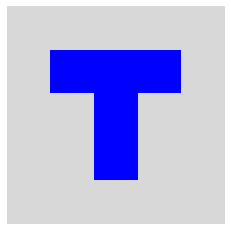

In [ ]:
board = np.array([[0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0]])

# wyświetlamy planszę
test = plot_blokus(board)

Funkcja `plot_blokus` wyświetla wartości 0 jako szare, 1 jako niebieskie, 2 - żółte, 3 - czerwone, 4 - zielone.

Chcemy aby filtr, który skonstruujemy dawał dodatnie wartości dla pól stykających się rogiem z naszym klockiem, ale niepozytywne (np. ujemne) gdy będzie się stykał ze ścianką. Dodatkowo dane pole musi być puste.  
Możemy te zasady zapisać liczbowo np. tak:  
* zajęte pole sąsiadujące na ukos ma wartość `+1`
* natomiast zajęte pole sąsiadujące bezpośrednio `-4`.  

Wtedy nawet jeżeli dane pole ma 4 sąsiadów na ukos, ale co najmniej jednego bezpośrednio stycznego - wartość splotu wychodzi na zero (`1 * 4 - 4`).  
Ujemną wagę `-4` damy też środkowemu polu filtra - jeżeli dane pole jest zajęte, to nie ma znaczenia, że styka się na ukos z polami zajętymi naszym klockiem. W związku z tym nasza definicja filtra będzie taka:

In [ ]:
filtr_dobre_pola = np.array([[ 1, -4,  1],
                             [-4, -4, -4],
                             [ 1, -4,  1]])

Wyświetlmy sobie teraz ten filtr (korzystamy z mapy kolorystycznej, w której niskie wartości odpowiadają niebieskiemu, a wysokie - czerwonemu):

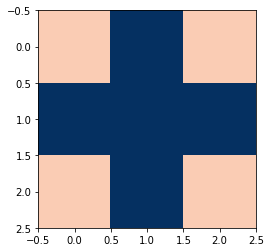

In [ ]:
plt.imshow(filtr_dobre_pola, vmin=-4, vmax=4, cmap='RdBu_r')

Teraz wykonamy splot planszy z naszym filtrem za pomocą funkcji `correlate`. Użyjemy trybu `mode='same'` aby wynik splotu (mapa korelacyjna) miała ten sam rozmiar co plansza (normalnie tracimy przy splocie na wysokości i szerokości, ale w tym specjalnym trybie - nie).

In [ ]:
dobre_pola = correlate(board, filtr_dobre_pola, mode='same')

Wyświetlimy sobie teraz wartości otrzymanej "mapy korelacyjnej". Skorzystamy z niskiej wartości dla `vmin` ponieważ filtr ma generalnie ujemne wagi i łatwiej w związku z tym otrzymać ujemną wartość. `vmax` ustawimy takie same jak `vmin` aby mapa kolorystyczna miała swój środek dla wartości 0, a więc dla mapy `RdBu_r`, aby wartości dodatnie były "czerwonawe", a ujemne - "niebieskawe".

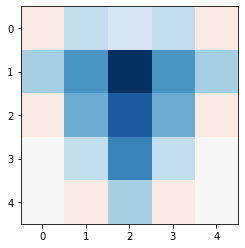

In [ ]:
plt.imshow(dobre_pola, vmin=-12, vmax=12, cmap='RdBu_r')

Pamiętajmy jednak, że w sieciach neuronowych nie korzystamy tylko ze splotu - po splocie stosujemy na mapie korelacyjnej nieliniową aktywację. Najczęściej jest to `ReLU`, które zeruje wszystkie wartości poniżej zera. Możemy otrzymać zachowanie aktywacji `ReLU` używając funkcji `np.maximum`, porównując elementy mapy korelacyjnej do 0: jeżeli dany element jest wyższy od zera - zostanie zwrócony, jeżeli jest niższy - zostanie zwrócone zero:

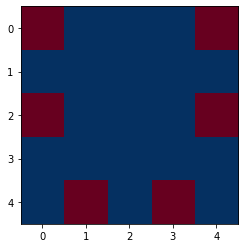

In [ ]:
# stosujemy relu
dobre_pola_po_relu = np.maximum(dobre_pola, 0)

# wyświetlamy mapę po relu
plt.imshow(dobre_pola_po_relu, cmap='RdBu_r')

Teraz wyświetlimy na jednym wykresie klocek na niebiesko (wartość 1) oraz wszystkie znalezione rogi na zielono (wartość 4). Aby mieć pewność, że wszystkie zidentyfikowane dobre pola będą miały dokładnie wartość 4 użyjemy operacji `> 0` na mapie korelacyjnej zamiast relu. Wynikiem operacji `> 0` będzie macierz prawd i fałszy ("czy większe od 0?"), którą następnie pomnożymy przez 4. Fałsze działają wtedy jak 0, a prawdy jak 1, więc w konsekwencji w `board_new` będziemy mieli czwórki tylko tam, gdzie w mapie korelacyjnej były wartości wyższe od 0 (a więc prawdy po operacji `> 0`).

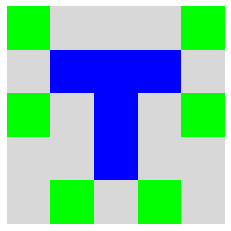

In [ ]:
board_new = board + (dobre_pola_po_relu > 0) * 4
plot_blokus(board_new)

#### Blokus, ćwiczenie 01
Jeżeli nie jest dla Ciebie jasne dlaczego taki filtr zadziałał, przelicz sobie na kartce kilka przykładowych pól - wybierz fragment 3 x 3 wokół danego pola i przemnóż wartości pól przez odpowiadające im wagi filtra, a następnie dodaj wyniki mnożenia. Sprawdź czy otrzymujesz taką samą wartość jak w danym polu w macierzy `dobre_pola`.

#### Blokus, ćwiczenie 02
Jeżeli wszystko jest jasne - stwórz filtr, który wykrywa pola sąsiadujące bezpośrednio ze ściankami klocka i wyświetl je na wykresie z klockiem na czerwono (`plot_blokus` wyświetla wartości 3 na czerwono). W ten sposób możemy wykrywać pola, na których nasz nowo wykładany klocek nie może się znaleźć.

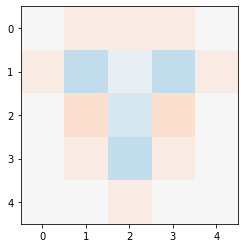

In [ ]:
filtr_zle_pola = np.array([[ 0, 1,  0],
                             [1, -4, 1],
                             [ 0, 1,  0]])

zle_pola = correlate(board, filtr_zle_pola, mode='same')
plt.imshow(zle_pola, vmin=-12, vmax=12, cmap='RdBu_r')

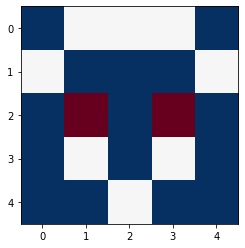

In [ ]:
# stosujemy relu
zle_pola_po_relu = np.maximum(zle_pola, 0)

# wyświetlamy mapę po relu
plt.imshow(zle_pola_po_relu, cmap='RdBu_r')

In [ ]:
zle_pola_po_relu

array([[0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 2, 0, 2, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0]])

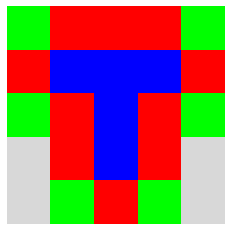

In [ ]:
board_new = board + (dobre_pola_po_relu > 0) * 4 + (zle_pola_po_relu > 0) * 3
plot_blokus(board_new)

Przekonajmy się jeszcze, że oba filtry zadziałają na większej planszy. Konstruujemy planszę poniżej:

In [ ]:
board2 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]])
dobre_pola = correlate(board2, filtr_dobre_pola, mode='same')
zle_pola = correlate(board2, filtr_zle_pola, mode='same')
zle_pola_po_relu = np.maximum(zle_pola, 0)
dobre_pola_po_relu = np.maximum(dobre_pola, 0)

I wyświetlamy:

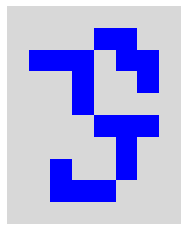

In [ ]:
plot_blokus(board2 )


#### Blokus, ćwiczenie 03
Stwórz teraz macierz `new_board2`, która będzie zawierać informacje o dobrych rogach (zielony kolor) i złych polach (czerwony). Macierz możesz stworzyć w kilku krokach (ale da się też to zrobić jedną linijką). 

In [ ]:
new_board2 = board2 + (dobre_pola_po_relu > 0) * 4 + (zle_pola_po_relu > 0) * 3




Na koniec tego ćwiczenia wyświetl macierz `new_board2`:

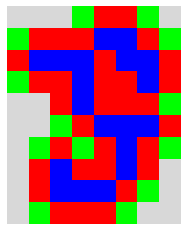

In [ ]:
plot_blokus(new_board2)

### Arytmetyka wymiarów danych sieci splotowych
Możesz przypomnieć sobie wideo o arytmetyce wymiarów splotu (do znalezienia na google classroom). Następnie sprawdź przykład poniżej i policz ręcznie jakie wymiary będzie miała mapa korelacyjna.  

In [ ]:
data = np.random.random(size=(10, 10))
filtr = np.random.random(size=(4, 3))

print('Rozmiar danych wejściowych:', data.shape)
print('Rozmiar filtra:', filtr.shape)
print('Jakie wymiary będzie miał output splotu?')

Rozmiar danych wejściowych: (10, 10)
Rozmiar filtra: (4, 3)
Jakie wymiary będzie miał output splotu?


A teraz sprawdź czy liczba wymiarów otrzymanych danych zgadza się z tą policzoną przez Ciebie? Korzystamy z opcji `mode='valid'` aby splot był wykonywany tak jak domyślnie w sieciach neuronowych.

In [ ]:
wynik = correlate(data, filtr, mode='valid')
wynik.shape

(7, 8)

Sprawdź rozmiar macierzy `wynik`

## obrazy RGB

W przypadku obrazów RGB sprawa jest bardziej skomplikowana - filtr (*kernel*) musi być trójwymiarowy, ponieważ obraz kolorowy jest trójwymiarowy - ma 3 warstwy głębokości - RGB. Nie będziemy robić własnoręcznie splotu w 3d (ale zasada jest ta sama co w przypadku 2d), zobaczymy sobie tylko strukturę obrazu RGB jako macierzy.

(-0.5, 1023.5, 767.5, -0.5)

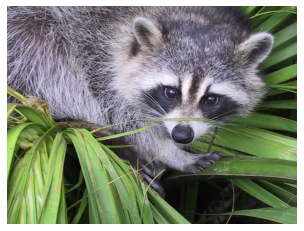

In [ ]:
raccoon = scipy.misc.face()
plt.imshow(raccoon)
plt.axis('off')

Sprawdź czy kształt macierzy faktycznie wskazuje na trzy wymiary:

In [ ]:
raccoon.shape

(768, 1024, 3)

In [ ]:
def show_rgb_layers(image, style='light', subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    im_shape = image.shape
    assert im_shape[-1] == 3
    assert image.ndim == 3

    if style == 'light':
        cmaps = ['Reds', 'Greens', 'Blues']

    fig, ax = plt.subplots(ncols=3, **subplots_args)
    for layer in range(3):
        if style == 'light':
            ax[layer].imshow(image[..., layer], cmap=cmaps[layer])
        else:
            temp_img = np.zeros(im_shape[:2] + (3,))
            temp_img[..., layer] = image[..., layer]
            ax[layer].imshow(temp_img)
        ax[layer].axis('off')

    return fig


Skorzystamy teraz z funkcji z naszego pakietu `emosie` aby zobaczyć oddzielnie warstwy R, G i B obrazu:

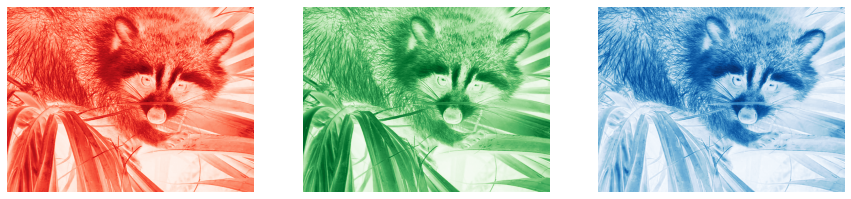

In [ ]:
# from emosie import show_rgb_layers

show_rgb_layers(raccoon, subplots_args={'figsize': (15, 5)});

## Max pooling

Zobaczmy teraz co z naszym obrazem robi max pooling.

In [ ]:
from skimage.measure import block_reduce

Korzystamy z funkcji `block_reduce`, której podajemy po kolei: obraz, rozmiar redukowanego bloku oraz operację redukcji. Max-pooling to redukcja za pomocą funkcji maksimum (`np.max`). Zrobimy dwa rodzaje max-pooling'u: dla bloku `(2, 2)` oraz dla bloku `(4, 4)`.

In [ ]:
# max-pooling 2 x 2
ascent_k1_maxpool = block_reduce(ascent_k1, (2, 2), np.max)

# max-pooling 4 x 4
ascent_k1_maxpool2 = block_reduce(ascent_k1, (4, 4), np.max)

Teraz wyświetlimy sobie obok siebie wyniki max-pooling'u

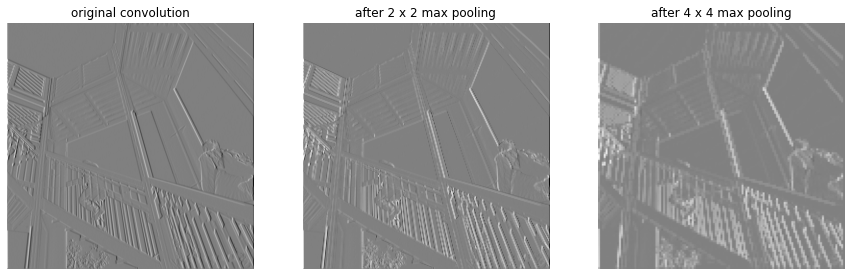

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

images = [ascent_k1, ascent_k1_maxpool, ascent_k1_maxpool2]
titles = ['original convolution', 'after 2 x 2 max pooling', 'after 4 x 4 max pooling']

for a, img, ttl in zip(ax, images, titles):
    a.imshow(img, cmap='gray', vmin=-730, vmax=730)
    a.set_title(ttl, fontsize=12)
    a.axis('off')

Przykład bardziej agresywnego max-pooling'u na obrazie pyszczka szopa, stosujemy max-pooling 12 na 12 (1 w trzecim wymiarze jest potrzebne bo obraz RGB ma trzy wymiary i trzeciego wymiaru nie chcemy redukować):

(-0.5, 85.5, 63.5, -0.5)

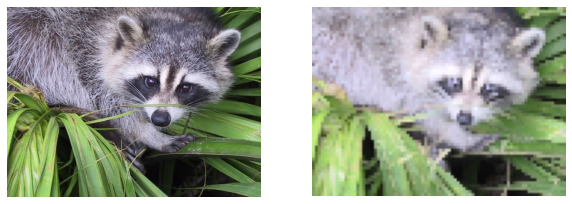

In [ ]:
raccoon_maxpool = block_reduce(raccoon, (12, 12, 1), np.max)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(raccoon)
ax[1].imshow(raccoon_maxpool)

ax[0].axis('off')
ax[1].axis('off')

Widzimy, że max-pooling zachowuje informacje o strukturze obrazu, ale wybiera maksymalne wartości, co w przypadku zwykłego obrazu (a nie pobudzenia warstwy sieci splotowej) prowadzi do pikselacji i rozjaśnienia.  

#### Max pooling, ćwiczenie
Zamiast operacji max pooling, zrób na pyszczku szopa mean pooling (każdy blok redukowany za pomocą średniej, a nie maksimum). Dodatkowo, nich każdy blok ma wielkość 10 x 10 x 1 (a nie 12 x 12 x 1, jak powyżej). 

(-0.5, 102.5, 76.5, -0.5)

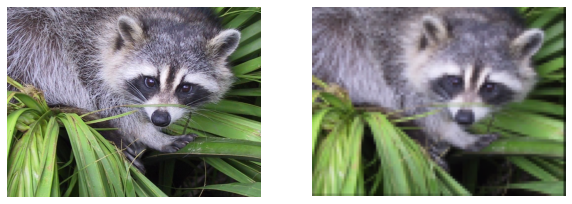

In [ ]:
raccoon_maxpool = np.round(block_reduce(raccoon, (10, 10, 1), np.mean)).astype(int)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(raccoon)
ax[1].imshow(raccoon_maxpool)

ax[0].axis('off')
ax[1].axis('off')